<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?



\begin{equation*}
P(E_3) = 60\% = \frac{3}{5}
\end{equation*}


### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

No. Because data(already captured a troll) changes probabilities.

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

E1(TTGGG) and E2(TGGGG)

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

\begin{equation*}
P(E_1|T) = \frac{P(T|E_1)\cdot P(E_1)}{P(T)} = \frac{\frac{1}{5}\cdot\frac{2}{5}}{\frac{1}{5}\cdot\frac{1}{5}+\frac{1}{5}\cdot\frac{2}{5}} = \frac{2}{3}
\end{equation*}

Probability of the other event given a troll captured: 

\begin{equation*}
P(E_2/T) = \frac{P(T|E_2)\cdot P(E_2)}{P(T)}\frac{\frac{1}{5}\cdot\frac{1}{5}}{\frac{1}{5}\cdot\frac{1}{5}+\frac{1}{5}\cdot\frac{2}{5}} = \frac{1}{3}
\end{equation*}

### 1.5

#### What is the chance of the knight crossing safely?

Only when E2 (TGGGG) happens, can the knight cross safely. So the Probability is 
\begin{equation*}
P(E_2|T) = \frac{1}{3}
\end{equation*}

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [15]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

   Resolving package versions...
    Updating `~/.julia/environments/v1.7/Project.toml`
  [9a3f8284] + Random
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [19]:
import Distributions as di
import Plots
import Polynomials
import Random

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [2]:
x = -10:10
x = collect(x)


21-element Vector{Int64}:
 -10
  -9
  -8
  -7
  -6
  -5
  -4
  -3
  -2
  -1
   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10

In [3]:
y_true = x .^ 2 + 3 .* x .- 2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [5]:
import Distributions as di
d = di.Normal(0,10)

Distributions.Normal{Float64}(μ=0.0, σ=10.0)

In [6]:
noise = rand(d,length(x))

21-element Vector{Float64}:
  11.527272843716851
   0.7542572961163121
   0.43041533273772387
  -0.037921977468730175
  -7.210472012441519
   2.128921660496904
  -1.6174547878079146
  -0.7733213361700331
  -6.730068926439038
  18.81321965332838
   6.22892970116741
 -16.309248225703563
   4.534249197151034
   0.9709756411742201
 -17.28535151365965
  -4.731613009868087
  -0.04901175394227169
  -1.0310629168449401
 -16.565050164340235
   2.019336326024682
  -3.669316801238996

In [7]:
y_observed = y_true + noise

21-element Vector{Float64}:
  79.52727284371684
  52.754257296116315
  38.430415332737724
  25.96207802253127
   8.78952798755848
  10.128921660496903
   0.38254521219208537
  -2.7733213361700333
 -10.730068926439039
  14.813219653328382
   4.22892970116741
 -14.309248225703563
  12.534249197151034
  16.97097564117422
   8.714648486340351
  33.268386990131916
  51.950988246057726
  66.96893708315505
  69.43494983565976
 108.01933632602469
 124.33068319876101

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

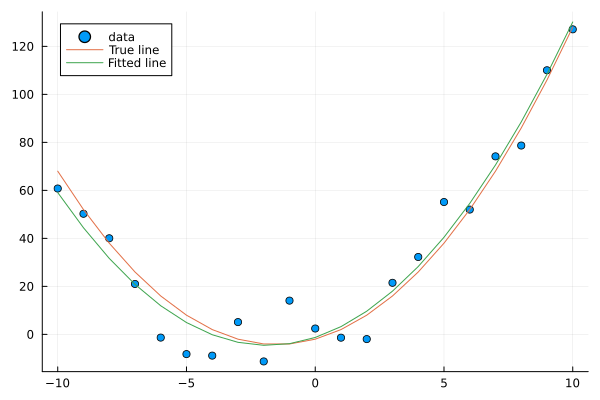

In [15]:
using Plots
using Polynomials
line_fit = fit(x,y_observed,2)
fit_coeff = coeffs(line_fit)
y_fitted = fit_coeff[1] .+ fit_coeff[2] .* x + fit_coeff[3] .* x .^ 2
scatter(x,y_observed, label="data")
plot!(x,y_true, label="True line")
plot!(x,y_fitted,label="Fitted line")

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

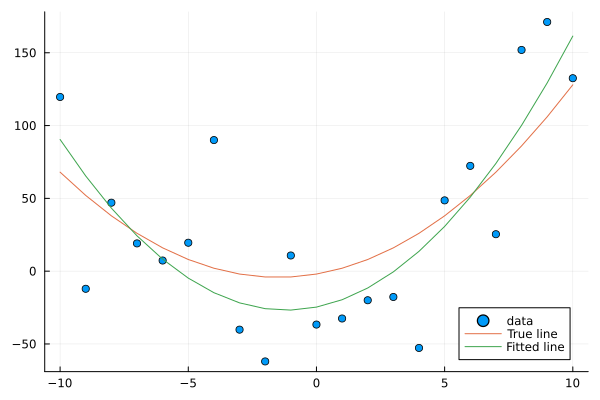

In [16]:
d = di.Normal(0,50)
noise = rand(d,length(x))
y_observed = y_true + noise
using Plots
line_fit = fit(x,y_observed,2)
fit_coeff = coeffs(line_fit)
y_fitted = fit_coeff[1] .+ fit_coeff[2] .* x + fit_coeff[3] .* x .^ 2
scatter(x,y_observed, label="data")
plot!(x,y_true, label="True line")
plot!(x,y_fitted,label="Fitted line")

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

The fit is further away from y_true. Because the noise comes from Gaussian distribution with a larger standard deviation, which means the noise doesn't gather as much as closely to the mean. The observed dots in turn disperse more and are harder to fit in a specific trend.

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


In [17]:
d = di.Normal(0,10)
noise = rand(d,length(x))
y_observed = y_true + noise
poly_fit = fit(x,y_observed,12)
x_fit = -10:0.0001:10
y_fitted = poly_fit.(x_fit)
scatter(x,y_observed, label="data")
plot!(x,y_true, label="True line")
plot!(x_fit,y_fitted,label="Fitted line")

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


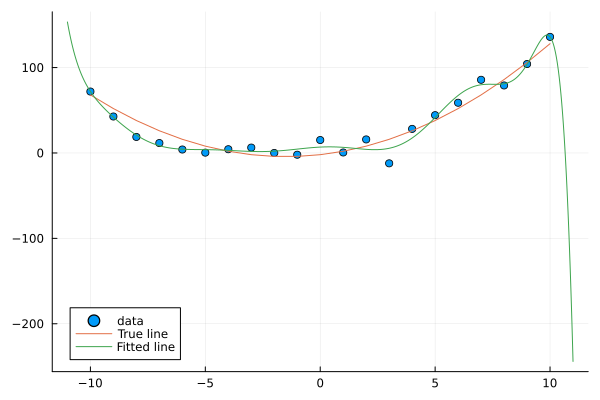

In [18]:
d = di.Normal(0,10)
noise = rand(d,length(x))
y_true = x .^ 2 + 3 .* x .- 2
y_observed = y_true + noise
poly_fit = fit(x,y_observed,12)
x_fit = -11:0.01:11
y_fitted = poly_fit.(x_fit)
scatter(x,y_observed, label="data")
plot!(x,y_true, label="True line")
plot!(x_fit,y_fitted,label="Fitted line")

3. What do you observe in the plot? What is this phenomenon called?

The fitted line goes through almost every observed data points. Overfitting.